# Deep Learning Course

## Assignment 1

#### Assignment Goals:

* Start with Keras.
* Implement and apply logistic regression and multi-layer feed-forward neural network classifiers.
* Understand the differences and trade-offs between linear regression, logistic regression, and multi-layer feed-forward neural network.

In this assignment, you will be asked to install Keras and Jupyter Notebook. Keras is packaged with TensorFlow 2.0 as tensorflow.keras, so you actually need to install Tensorflow 2.0. (TA's environment to run your code is Python 3.7 + Tensorflow 2.4). In addition, you are required to design several models to classify a Toy Dataset (Figure 1).

#### Dataset: 

We provide a toy dataset, which has 200 instances and 2 features. See below "Toy Data and Helper Functions" section for toy data generation code. 

You do not need to generate separated training dataset and test dataset for this assignment. Both training and prediction will both be on one dataset. Directly use the "sample, target" variables we provide as the dataset for your assignment. 

In the following accuracy is defined as the empirical accuracy on the training set, that is, accuracy = {number of correctly predicted instances}/{number of all instances in dataset}).

#### Requirements

1. Install Keras (Tensorflow 2) and Jupyter Notebook. (10 points)
    
2. Implement a [logistic regression](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc) to classify the Toy Dataset. (20 points) We have provided a very simple linear regression example, please refer to the example and implement your logistic regression model. 
    * You should determine: what loss function and what optimization algorithm do you plan to use? (4 points)
    * Try to reach > 72% accuracy. (4 points)
    * We have provided a visualize() helper function, you can visualize the model's decision boundary using that function. What's more, you are asked to compute and visualize **the equation of the decision boundary** of your trained **logistic regression**. Fill in the 'equation of decision boundary' column in the following table. Then you can modify the visualize() function or implement a new visualization function to draw the linear decision boundary (Hint: should be a straight line aligned with the decision boundary plotted in visualize()). (5 points)
    

3. Implement a multi-layer linear neural network (>= 2 hidden layers) to classify the Toy Dataset. (20 points) A deep linear neural network is a deep feed-forward neural network without activation functions (See [here](https://www.cs.princeton.edu/courses/archive/fall19/cos597B/lecnotes/linearnetsbyNC.pdf), page 11-13 for detail introduction of linear neural networks). 
    * You should determine: what loss function and what optimization algorithm do you plan to use, what is your network structure? (4 points)
    * Try to reach > 72% accuracy. (4 points)
    * Compute and visualize **the equation of the decision boundary** of your trained **linear neural network**. Fill in the 'equation of decision boundary' column in the following table. Then you can modify the visualize() function or implement a new visualization function to draw the linear decision boundary. (5 points)
    

4. Implement a multi-layer feed-forward neural network (>= 2 hidden layers). (20 points)
    * You should determine: what loss function and what optimization algorithm do you plan to use? what is your network structure? what activation function do you use? (5 points)
    * Try to reach 100% accuracy. (5 points)


5. Add L2-regularization to your implemented nonlinear neural network in (4.). Set the coefficient of L2-regularization to be 0.01, 2, 100, respectively. How do different values of coefficient of L2-regularization affect the model (i.e., model parameters, loss value, accuracy, decision boundary)? You can use a table to compare models trained without regularization, with different coefficients of regularization. (20 points) 
    * Please draw your table and analysis in the '**Answers and Analysis**' section.


You should:

* Train each of your models to its best accuracy. Then fill in the following table in the '**Answers and Analysis**' section.

* Complete the '**Answers and Analysis**' section. 

#### Answers and Analysis

* First, fill in the following table. The '-' indicates a cell that does not need to be filled in.

|  Model | Loss  | Accuracy | Equation of Decision Boundary | NN Structure | Activation Function | Loss Function |
|---|:---:|:---:|:---: | :---: | :---: | :---: |
| Linear Regression  |  0.14 |  72.96% | $-1.28x_1+7.62x_2 - 0.07=0$  | -  | -  | Mean Square Error  |
| Logistic Regression  |0.44|0.7824|$-0.78x_1 +  2.81x_2 -0.382=0$| -  |  - | Binary Cross Entropy| 
| Linear Neural Network  |0.298|0.84| $-7.37x_1+8.00x_2 - 0.092=0$|-|-|Binary Cross Entropy| 
| Feedforward Neural Network | 0.05|0.9925| -  |(Figure)|ReLU, Sigmoid Output| Binary Cross Entropy|


* Then, compare and analyze the classification results of your models. In particular, are there any differences between the performance (i.e., accuracy, loss value) of linear regression, logistic regression, linear neural network and deep nonlinear neural network? What do you think is the reason for the difference? (10 points)

* Your table and analysis of (5. Add L2-regularization) here.



#### Submission Notes:

Please use Jupyter Notebook. The notebook should include the final code, results and your answers. You should submit your Notebook in both .pdf and .ipynb format. 



#### Instructions:

The university policy on academic dishonesty and plagiarism (cheating) will be taken very seriously in this course. Everything submitted should be your own writing or coding. You must not let other students copy your work. Spelling and grammar count.


Your assignments will be marked based on correctness, originality (the implementations and ideas are from yourself), clarity and performance.
Clarity means whether the logic of your code is easy to follow. This includes 1) comments to explain the logic of your code 2) meaningful variable names. Performance includes loss value and accuracy after training.


  

## Your Implementation

### Toy Data and Helper Functions

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt


In [23]:
# helper functions

# helper function for geterating the data
def data_generator(N = 200,D = 2,K = 2):
    """
    N: number of points per class; 
    D: dimensionality; 
    K: number of classes
    """
    np.random.seed(0)
    X = np.zeros((N*K,D))
    y = np.zeros((N*K), dtype='uint8')
    
    for j in range(K):
        ix = range(N*j,N*(j+1))
        r = np.linspace(0.0,1,N) # radius
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.3 # theta
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    
    fig = plt.figure()
    plt.title('Figure 1: DataSet')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
   
    plt.xlim(X.min()-.5, X.max()+.5)
    plt.ylim(X.min()-.5, X.max()+.5)
    
    return X,y


# helper function for visualizing the decision boundaries
def visualize(sample, target, model):
    """
    function for visualizing the classifier boundaries on the TOY dataset.

    sample: Training data features
    target: Target 
    model: the model
    """
    h = 0.02
    x_min, x_max = sample[:, 0].min() - 1, sample[:, 0].max() + 1
    y_min, y_max = sample[:, 1].min() - 1, sample[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    

    Z = model.predict_classes(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(sample[:, 0], sample[:, 1], c=target, s=40, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    return

def visualize_mod(sample, target, model):
    """
    function for visualizing the classifier boundaries on the TOY dataset.

    sample: Training data features
    target: Target 
    model: the model
    """
    h = 0.02
    x_min, x_max = sample[:, 0].min() - 1, sample[:, 0].max() + 1
    y_min, y_max = sample[:, 1].min() - 1, sample[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    w1 = model.get_weights()[0][0]
    w2 = model.get_weights()[0][1]
    b = model.get_weights()[1]
    
    x1 = np.arange(x_min-1,x_max+1,h)
    x2 = -(w1/w2)*x1 -b/w2
    
    Z = model.predict_classes(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    print(w1[0],"x1 + ",w2[0],"x2",b[0],"= 0")
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(sample[:, 0], sample[:, 1], c=target, s=40, cmap=plt.cm.Spectral)
    plt.scatter(x1,x2,c='green', s=2)
    
    plt.xlim(xx.min()-1, xx.max()+1)
    plt.ylim(yy.min()-1, yy.max()+1)
    
    return


def visualize_dlnn(sample, target, model):
    """
    function for visualizing the classifier boundaries on the TOY dataset.

    sample: Training data features
    target: Target 
    model: the model
    """
    h = 0.02
    x_min, x_max = sample[:, 0].min() - 1, sample[:, 0].max() + 1
    y_min, y_max = sample[:, 1].min() - 1, sample[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    wts = model.get_weights()
    II = np.array([[1,0],[0,1]])
    bias = {}
    weights = {}
    w_count =1
    b_count =1
    for i,W in enumerate(wts):

        if i%2 ==0:
            weights[w_count]=W
            w = W
            II = np.matmul(w.T, II)
            w_count += 1
        else:
            bias[b_count] = W
            b_count+=1

    BBB = bias[4]+np.matmul(weights[4].T,bias[3])+ \
    np.matmul(weights[4].T,np.matmul(weights[3].T,bias[2]))+ \
    np.matmul(weights[4].T,(np.matmul(weights[3].T,np.matmul(weights[2].T,bias[1]))))

    w1 = II[0][0]
    w2 = II[0][1]
    b = BBB
    x1 = np.arange(x_min-1,x_max+1,h)
    x2 = -(w1*x1)/w2 -b/(w2)
    print(w1,"x1 + ",w2,"x2",b,"= 0")
    
    Z = model.predict_classes(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(sample[:, 0], sample[:, 1], c=target, s=40, cmap=plt.cm.Spectral)
    plt.scatter(x1,x2,c='green', s=2)
    
    plt.xlim(xx.min()-1, xx.max()+1)
    plt.ylim(yy.min()-1, yy.max()+1)
    
    return


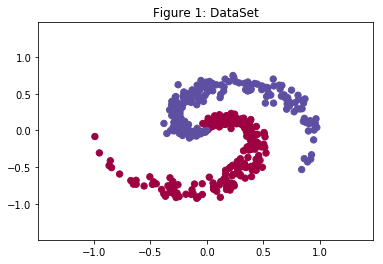

In [3]:
#  TOY DataSet
sample, target = data_generator(N = 200)
# print(target.shape)

### Given Example: Linear Regression


Note that linear regression is usually used for regression tasks, not classification tasks. However, it can be used for binary classification problems (be labeled 0, 1) with a threshold classifier. That is, when linear regression outputs > 0.5, the prediction is 1; otherwise, the prediction is 0. 

In [4]:
#Define the model
linear_regression = keras.Sequential()

linear_regression.add(keras.layers.Dense(1,"linear"))

linear_regression.compile(optimizer="sgd",loss= keras.losses.MeanSquaredError(), metrics=['accuracy'])

# Train the model
value_epoches = linear_regression.fit(sample, target, epochs=5,batch_size=1)

Train on 400 samples
Epoch 1/5
400/400 [==============================] - 2s 4ms/sample - loss: 0.1857 - accuracy: 0.7525
Epoch 2/5
400/400 [==============================] - 1s 3ms/sample - loss: 0.1471 - accuracy: 0.7475
Epoch 3/5
400/400 [==============================] - 1s 3ms/sample - loss: 0.1453 - accuracy: 0.7375
Epoch 4/5
400/400 [==============================] - 1s 3ms/sample - loss: 0.1433 - accuracy: 0.7475
Epoch 5/5
400/400 [==============================] - 1s 3ms/sample - loss: 0.1445 - accuracy: 0.7250


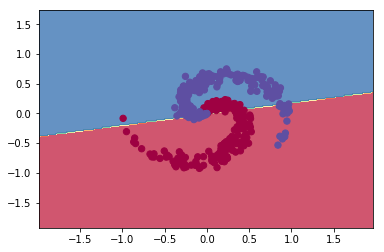

In [5]:
visualize(sample,target, linear_regression)

**Here is an example: the green line is the line of the decision boundary. You should draw the linear decision boundary like this.**

![hw1_img1.png](hw1_img1.png)

### Logistic Regression

#### Logistic Regression Model & Training Accuracy

In [6]:
# implement your logistic regression here
logistic_regression = keras.Sequential()

logistic_regression.add(keras.layers.Dense(1,input_shape=(2,),
                                          activation = keras.activations.sigmoid,
                                          bias_initializer=keras.initializers.Constant(0.1)))

logistic_regression.compile(optimizer="sgd",loss= 'binary_crossentropy', metrics=['binary_accuracy'])

# Train the model
value_epoches = logistic_regression.fit(sample, target, epochs=5,batch_size=1,
                                        shuffle=True, verbose = 1, validation_split=0.2)


Train on 320 samples, validate on 80 samples
Epoch 1/5
320/320 [==============================] - 1s 3ms/sample - loss: 0.5450 - binary_accuracy: 0.8625 - val_loss: 1.0102 - val_binary_accuracy: 0.2375
Epoch 2/5
320/320 [==============================] - 1s 3ms/sample - loss: 0.5056 - binary_accuracy: 0.8625 - val_loss: 1.0780 - val_binary_accuracy: 0.2375
Epoch 3/5
320/320 [==============================] - 1s 3ms/sample - loss: 0.4822 - binary_accuracy: 0.8500 - val_loss: 1.1135 - val_binary_accuracy: 0.2500
Epoch 4/5
320/320 [==============================] - 1s 3ms/sample - loss: 0.4648 - binary_accuracy: 0.8406 - val_loss: 1.1271 - val_binary_accuracy: 0.2750
Epoch 5/5
320/320 [==============================] - 1s 2ms/sample - loss: 0.4505 - binary_accuracy: 0.8406 - val_loss: 1.1350 - val_binary_accuracy: 0.3000


#### Logistic Regression Model Visualization

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None


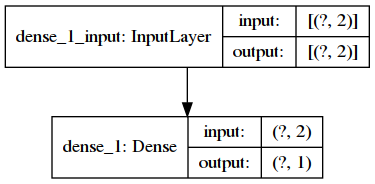

In [7]:
print(logistic_regression.summary())
tf.keras.utils.plot_model(logistic_regression,show_shapes=True,
                          show_layer_names=True,
                          rankdir="TB",expand_nested=True,dpi=96,)

#### Visualization: Decision Boundary and Equation

-1.6774966 x1 +  1.7757245 x2 -0.3943837 = 0
Loss =  0.5816271877288819 
Accuracy = 0.7375


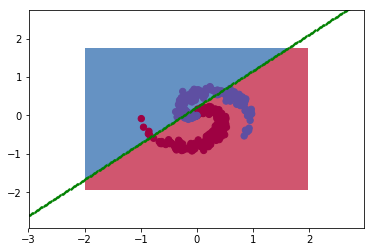

In [33]:

visualize_mod(sample,target, logistic_regression)
scores = logistic_regression.evaluate(sample,target, verbose = False)
print("Loss = ",scores[0], "\nAccuracy =",scores[1])

### Deep Linear Neural Network

####  Deep linear NN Model & Training Accuracy

In [25]:
# # implement your nonlinear feed forward neural network here
DLNN_model = keras.Sequential()

DLNN_model.add(keras.layers.Dense(12,input_shape=(2,),
                                          activation = tf.keras.activations.linear,))
DLNN_model.add(keras.layers.Dense(9,input_shape=(12,),
                                          activation = tf.keras.activations.linear,))
DLNN_model.add(keras.layers.Dense(2,input_shape=(9,),
                                          activation = tf.keras.activations.linear,))

DLNN_model.add(keras.layers.Dense(1,input_shape=(2,),
                                          activation = tf.keras.activations.sigmoid,))

DLNN_model.compile(optimizer="sgd",loss= 'binary_crossentropy', metrics=['binary_accuracy'])

# Train the model
value_epoches = DLNN_model.fit(sample, target, epochs=5,batch_size=1,
                                        shuffle=True, verbose = 1, validation_split=0.2)


Train on 320 samples, validate on 80 samples
Epoch 1/5
320/320 [==============================] - 1s 3ms/sample - loss: 0.4643 - binary_accuracy: 0.7875 - val_loss: 1.6906 - val_binary_accuracy: 0.3875
Epoch 2/5
320/320 [==============================] - 1s 3ms/sample - loss: 0.3181 - binary_accuracy: 0.8625 - val_loss: 2.2651 - val_binary_accuracy: 0.4125
Epoch 3/5
320/320 [==============================] - 1s 3ms/sample - loss: 0.3082 - binary_accuracy: 0.8562 - val_loss: 2.2611 - val_binary_accuracy: 0.4500
Epoch 4/5
320/320 [==============================] - 1s 3ms/sample - loss: 0.3016 - binary_accuracy: 0.8594 - val_loss: 2.6210 - val_binary_accuracy: 0.4250
Epoch 5/5
320/320 [==============================] - 1s 3ms/sample - loss: 0.3047 - binary_accuracy: 0.8594 - val_loss: 3.0414 - val_binary_accuracy: 0.3625


#### DLL Model Visualization

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 12)                36        
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 117       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
Total params: 176
Trainable params: 176
Non-trainable params: 0
_________________________________________________________________
None


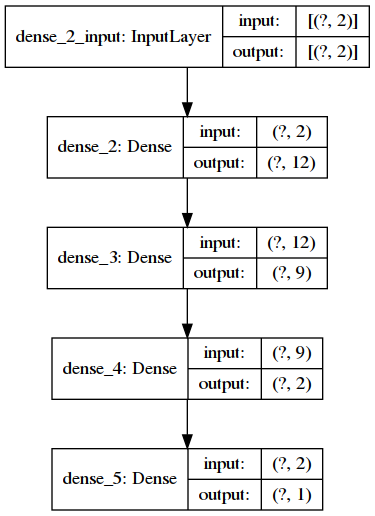

In [10]:
print(DLNN_model.summary())
tf.keras.utils.plot_model(DLNN_model,show_shapes=True,
                          show_layer_names=True,
                          rankdir="TB",expand_nested=True,dpi=96,)

-7.019873133632146 x1 +  7.848244987203241 x2 [-1.4261856] = 0
Loss =  0.8510210802592337 
Accuracy = 0.7625


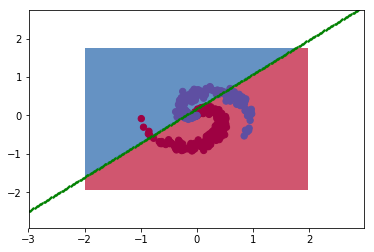

In [34]:
visualize_dlnn(sample,target, DLNN_model)
scores = DLNN_model.evaluate(sample,target, verbose = False)
print("Loss = ",scores[0], "\nAccuracy =",scores[1])

### Deep Neural Network

#### Feed forward Deep Neural Network

In [38]:
# implement your nonlinear feed forward neural network here
DFFNN_model = keras.Sequential()

DFFNN_model.add(keras.layers.Dense(96,input_shape=(2,),
                                          activation = tf.keras.activations.relu,))
DFFNN_model.add(keras.layers.Dense(200,input_shape=(96,),
                                          activation = tf.keras.activations.relu,))
DFFNN_model.add(keras.layers.Dense(96,input_shape=(200,),
                                          activation = tf.keras.activations.relu,))
DFFNN_model.add(keras.layers.Dense(24,input_shape=(48,),
                                          activation = tf.keras.activations.relu,))
DFFNN_model.add(keras.layers.Dense(2,input_shape=(24,),
                                          activation = tf.keras.activations.relu,))

DFFNN_model.add(keras.layers.Dense(1,input_shape=(2,),
                                          activation = tf.keras.activations.sigmoid,))

DFFNN_model.compile(optimizer="adam",loss= 'binary_crossentropy', metrics=['accuracy'])

# Train the model
value_epoches = DFFNN_model.fit(sample, target, epochs=20,batch_size=1,
                                        shuffle=True, verbose = 1, validation_split=0.0)


Train on 400 samples
Epoch 1/20
400/400 [==============================] - 1s 3ms/sample - loss: 0.5264 - accuracy: 0.8200
Epoch 2/20
400/400 [==============================] - 1s 2ms/sample - loss: 0.4237 - accuracy: 0.9025
Epoch 3/20
400/400 [==============================] - 1s 2ms/sample - loss: 0.3127 - accuracy: 0.9650
Epoch 4/20
400/400 [==============================] - 1s 2ms/sample - loss: 0.2582 - accuracy: 0.9725
Epoch 5/20
400/400 [==============================] - 1s 3ms/sample - loss: 0.2527 - accuracy: 0.9675
Epoch 6/20
400/400 [==============================] - 1s 2ms/sample - loss: 0.1888 - accuracy: 0.9825
Epoch 7/20
400/400 [==============================] - 1s 3ms/sample - loss: 0.1572 - accuracy: 0.9875
Epoch 8/20
400/400 [==============================] - 1s 3ms/sample - loss: 0.1421 - accuracy: 0.9900
Epoch 9/20
400/400 [==============================] - 1s 3ms/sample - loss: 0.1362 - accuracy: 0.9800
Epoch 10/20
400/400 [==============================] - 1s 3ms

#### FFDNN Model Summary & layers

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 96)                288       
_________________________________________________________________
dense_11 (Dense)             (None, 200)               19400     
_________________________________________________________________
dense_12 (Dense)             (None, 96)                19296     
_________________________________________________________________
dense_13 (Dense)             (None, 24)                2328      
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 50        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 3         
Total params: 41,365
Trainable params: 41,365
Non-trainable params: 0
__________________________________________________

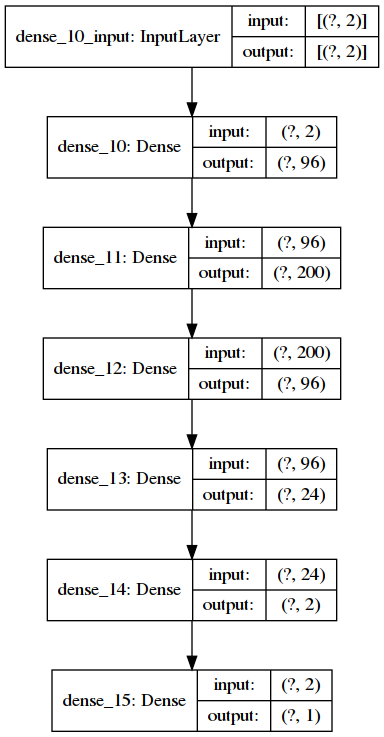

In [39]:
print(DFFNN_model.summary())
tf.keras.utils.plot_model(DFFNN_model,show_shapes=True,
                          show_layer_names=True,
                          rankdir="TB",expand_nested=True,dpi=96,)

Loss =  0.050820269919090506 
Accuracy = 0.9925


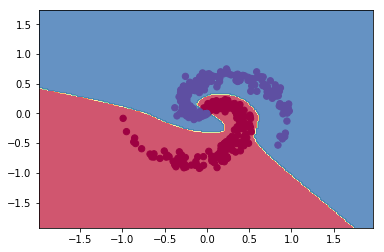

In [40]:
visualize(sample,target, DFFNN_model)
scores = DFFNN_model.evaluate(sample,target, verbose = False)
print("Loss = ",scores[0], "\nAccuracy =",scores[1])

### Deep Neural Network with L2-regularization

$\lambda = 0.01, 2, 100$


####  Regularization with $\lambda = 0.01$

In [41]:
lambda_l2 = 0.01
DFFNN_model = keras.Sequential()

DFFNN_model.add(keras.layers.Dense(96,input_shape=(2,),
                                          activation = tf.keras.activations.relu,
                                          activity_regularizer = tf.keras.regularizers.L1L2(l1 = 0.0, l2=lambda_l2),))
DFFNN_model.add(keras.layers.Dense(200,input_shape=(96,),
                                          activation = tf.keras.activations.relu,
                                  activity_regularizer = tf.keras.regularizers.L1L2(l1 = 0.0, l2=lambda_l2),))
DFFNN_model.add(keras.layers.Dense(96,input_shape=(200,),
                                          activation = tf.keras.activations.relu,
                                  activity_regularizer = tf.keras.regularizers.L1L2(l1 = 0.0, l2=lambda_l2),))
DFFNN_model.add(keras.layers.Dense(24,input_shape=(48,),
                                          activation = tf.keras.activations.relu,
                                  activity_regularizer = tf.keras.regularizers.L1L2(l1 = 0.0, l2=lambda_l2),))
DFFNN_model.add(keras.layers.Dense(2,input_shape=(24,),
                                          activation = tf.keras.activations.relu,
                                  activity_regularizer = tf.keras.regularizers.L1L2(l1 = 0.0, l2=lambda_l2),))

DFFNN_model.add(keras.layers.Dense(1,input_shape=(2,),
                                          activation = tf.keras.activations.sigmoid,))

DFFNN_model.compile(optimizer="adam",loss= 'binary_crossentropy', metrics=['accuracy'])

# Train the model
value_epoches = DFFNN_model.fit(sample, target, epochs=20,batch_size=1,
                                        shuffle=True, verbose = 1, validation_split=0.0)


Train on 400 samples
Epoch 1/20
400/400 [==============================] - 2s 4ms/sample - loss: 0.4965 - accuracy: 0.8225
Epoch 2/20
400/400 [==============================] - 1s 3ms/sample - loss: 0.3001 - accuracy: 0.9450
Epoch 3/20
400/400 [==============================] - 1s 3ms/sample - loss: 0.2096 - accuracy: 0.9700
Epoch 4/20
400/400 [==============================] - 1s 3ms/sample - loss: 0.1657 - accuracy: 0.9850
Epoch 5/20
400/400 [==============================] - 2s 4ms/sample - loss: 0.1421 - accuracy: 0.9875
Epoch 6/20
400/400 [==============================] - 1s 3ms/sample - loss: 0.1399 - accuracy: 0.9825
Epoch 7/20
400/400 [==============================] - 1s 3ms/sample - loss: 0.1262 - accuracy: 0.9825
Epoch 8/20
400/400 [==============================] - 1s 4ms/sample - loss: 0.1102 - accuracy: 0.9925
Epoch 9/20
400/400 [==============================] - 2s 4ms/sample - loss: 0.1150 - accuracy: 0.9875
Epoch 10/20
400/400 [==============================] - 2s 4ms

Loss =  0.17352865487337113 
Accuracy = 0.97


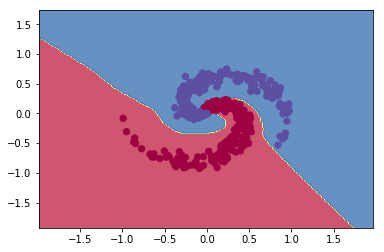

In [42]:
visualize(sample,target, DFFNN_model)
scores = DFFNN_model.evaluate(sample,target, verbose = False)
print("Loss = ",scores[0], "\nAccuracy =",scores[1])

####  Regularization with $\lambda = 2$

In [44]:
lambda_l2 = 2
DFFNN_model = keras.Sequential()

DFFNN_model.add(keras.layers.Dense(96,input_shape=(2,),
                                          activation = tf.keras.activations.relu,
                                          activity_regularizer = tf.keras.regularizers.L1L2(l1 = 0.0, l2=lambda_l2),))
DFFNN_model.add(keras.layers.Dense(200,input_shape=(96,),
                                          activation = tf.keras.activations.relu,
                                  activity_regularizer = tf.keras.regularizers.L1L2(l1 = 0.0, l2=lambda_l2),))
DFFNN_model.add(keras.layers.Dense(96,input_shape=(200,),
                                          activation = tf.keras.activations.relu,
                                  activity_regularizer = tf.keras.regularizers.L1L2(l1 = 0.0, l2=lambda_l2),))
DFFNN_model.add(keras.layers.Dense(24,input_shape=(48,),
                                          activation = tf.keras.activations.relu,
                                  activity_regularizer = tf.keras.regularizers.L1L2(l1 = 0.0, l2=lambda_l2),))
DFFNN_model.add(keras.layers.Dense(2,input_shape=(24,),
                                          activation = tf.keras.activations.relu,
                                  activity_regularizer = tf.keras.regularizers.L1L2(l1 = 0.0, l2=lambda_l2),))

DFFNN_model.add(keras.layers.Dense(1,input_shape=(2,),
                                          activation = tf.keras.activations.sigmoid,))

DFFNN_model.compile(optimizer="adam",loss= 'binary_crossentropy', metrics=['accuracy'])

# Train the model
value_epoches = DFFNN_model.fit(sample, target, epochs=20,batch_size=1,
                                        shuffle=True, verbose = 1, validation_split=0.0)


Train on 400 samples
Epoch 1/20
400/400 [==============================] - 2s 4ms/sample - loss: 0.8498 - accuracy: 0.5000
Epoch 2/20
400/400 [==============================] - 1s 3ms/sample - loss: 0.6966 - accuracy: 0.4900
Epoch 3/20
400/400 [==============================] - 1s 2ms/sample - loss: 0.6939 - accuracy: 0.4575
Epoch 4/20
400/400 [==============================] - 1s 2ms/sample - loss: 0.6934 - accuracy: 0.4550
Epoch 5/20
400/400 [==============================] - 2s 4ms/sample - loss: 0.6934 - accuracy: 0.4825
Epoch 6/20
400/400 [==============================] - 1s 2ms/sample - loss: 0.6933 - accuracy: 0.4825
Epoch 7/20
400/400 [==============================] - 1s 2ms/sample - loss: 0.6933 - accuracy: 0.4850
Epoch 8/20
400/400 [==============================] - 1s 2ms/sample - loss: 0.6933 - accuracy: 0.4525
Epoch 9/20
400/400 [==============================] - 1s 2ms/sample - loss: 0.6933 - accuracy: 0.4425
Epoch 10/20
400/400 [==============================] - 1s 2ms

Loss =  0.6931477785110474 
Accuracy = 0.5


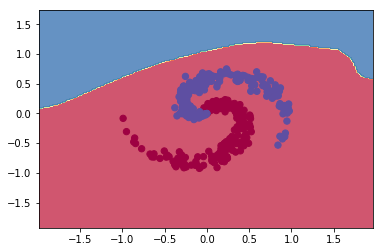

In [45]:
visualize(sample,target, DFFNN_model)
scores = DFFNN_model.evaluate(sample,target, verbose = False)
print("Loss = ",scores[0], "\nAccuracy =",scores[1])

####  Regularization with $\lambda = 100$

In [46]:
lambda_l2 = 100
DFFNN_model = keras.Sequential()

DFFNN_model.add(keras.layers.Dense(96,input_shape=(2,),
                                          activation = tf.keras.activations.tanh,
                                          activity_regularizer = tf.keras.regularizers.L1L2(l1 = 0.0, l2=lambda_l2),))
DFFNN_model.add(keras.layers.Dense(200,input_shape=(96,),
                                          activation = tf.keras.activations.tanh,
                                  activity_regularizer = tf.keras.regularizers.L1L2(l1 = 0.0, l2=lambda_l2),))
DFFNN_model.add(keras.layers.Dense(96,input_shape=(200,),
                                          activation = tf.keras.activations.relu,
                                  activity_regularizer = tf.keras.regularizers.L1L2(l1 = 0.0, l2=lambda_l2),))
DFFNN_model.add(keras.layers.Dense(24,input_shape=(48,),
                                          activation = tf.keras.activations.relu,
                                  activity_regularizer = tf.keras.regularizers.L1L2(l1 = 0.0, l2=lambda_l2),))
DFFNN_model.add(keras.layers.Dense(2,input_shape=(24,),
                                          activation = tf.keras.activations.relu,
                                  activity_regularizer = tf.keras.regularizers.L1L2(l1 = 0.0, l2=lambda_l2),))

DFFNN_model.add(keras.layers.Dense(1,input_shape=(2,),
                                          activation = tf.keras.activations.sigmoid,))

DFFNN_model.compile(optimizer="adam",loss= 'binary_crossentropy', metrics=['accuracy'])

# Train the model
value_epoches = DFFNN_model.fit(sample, target, epochs=20,batch_size=1,
                                        shuffle=True, verbose = 1, validation_split=0.0)


Train on 400 samples
Epoch 1/20
400/400 [==============================] - 2s 6ms/sample - loss: 34.8205 - accuracy: 0.4550
Epoch 2/20
400/400 [==============================] - 2s 5ms/sample - loss: 2.9731 - accuracy: 0.4825
Epoch 3/20
400/400 [==============================] - 1s 3ms/sample - loss: 0.7804 - accuracy: 0.4850
Epoch 4/20
400/400 [==============================] - 2s 5ms/sample - loss: 0.6949 - accuracy: 0.4850
Epoch 5/20
400/400 [==============================] - 2s 5ms/sample - loss: 0.6934 - accuracy: 0.5000
Epoch 6/20
400/400 [==============================] - 2s 5ms/sample - loss: 0.6934 - accuracy: 0.4900
Epoch 7/20
400/400 [==============================] - 1s 3ms/sample - loss: 0.6934 - accuracy: 0.4700
Epoch 8/20
400/400 [==============================] - 1s 3ms/sample - loss: 0.6934 - accuracy: 0.4850
Epoch 9/20
400/400 [==============================] - 1s 4ms/sample - loss: 0.6934 - accuracy: 0.5000
Epoch 10/20
400/400 [==============================] - 1s 3m

Loss =  0.6931891822814942 
Accuracy = 0.5


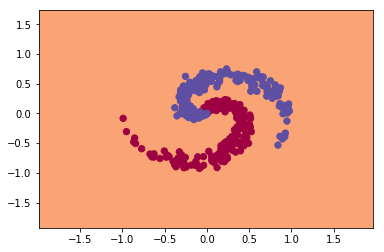

In [47]:
visualize(sample,target, DFFNN_model)
scores = DFFNN_model.evaluate(sample,target, verbose = False)
print("Loss = ",scores[0], "\nAccuracy =",scores[1])